<a href="https://colab.research.google.com/github/calvinIcePhon/DM-Practicals-PracticalLab/blob/main/practical8/prac8_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 8: Neural Network

### Prepared by: <a href="https://www.linkedin.com/in/a-kanaan/">Dr Abdulkarim M. Jamal Kanaan</a>
<hr>

* Acknowledgements: I would like to acknowledge the book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" written by Aurélien Géron. This practical exercise was prepared by Chapter 10 of the book, titled "Introduction to Artificial Neural Networks with Keras."

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/a-kanaan/dm-practicals/blob/main/practical8/prac8_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers
y_pred

array([ True, False])

## Regression MLPs

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[100, 100, 100], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid) #clean prediction
rmse = mean_squared_error(y_valid, y_pred, squared=False) #validation score
rmse

0.9699531549725992

## Classification MLPs

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid) #score by default
accuracy

1.0

## Building an Image Classifier Using the Sequential API

In [11]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

4422102/4422102 [==============================] - 1s 0us/step


In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_train.shape

(55000, 28, 28)

In [14]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

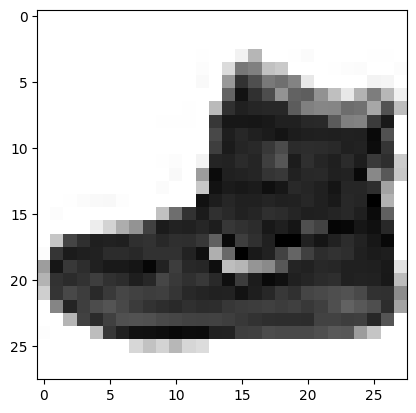

In [16]:
#show sample
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis()
plt.show()

In [17]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [18]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Ankle boot'

### Create Model

In [22]:
# create model
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28])) #28X28=784
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu")) #1st hidden
model.add(tf.keras.layers.Dense(100, activation="relu")) #2nd hidden
model.add(tf.keras.layers.Dense(10, activation="softmax")) #output layer

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.layers

In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06372397,  0.02572404,  0.01961656, ...,  0.0562464 ,
        -0.02996573,  0.00782795],
       [-0.06043519, -0.05677768,  0.03119909, ..., -0.0671306 ,
        -0.00290108,  0.00409801],
       [-0.04877415, -0.05297039,  0.04840655, ..., -0.04145952,
         0.02382629,  0.0622977 ],
       ...,
       [ 0.05764174,  0.00593592, -0.02295828, ...,  0.06284884,
         0.0556052 , -0.00978699],
       [ 0.01277514,  0.02862033,  0.0068188 , ...,  0.05120991,
        -0.02664011, -0.0454836 ],
       [-0.01402328, -0.0473368 , -0.06134793, ...,  0.03531644,
        -0.01706351, -0.01587951]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

### Compile Model

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Train Model

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2192 - accuracy: 0.9205 - val_loss: 0.3326 - val_accuracy: 0.8810
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2164 - accuracy: 0.9219 - val_loss: 0.3206 - val_accuracy: 0.8840
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2118 - accuracy: 0.9230 - val_loss: 0.3188 - val_accuracy: 0.8840
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2097 - accuracy: 0.9250 - val_loss: 0.3090 - val_accuracy: 0.8908
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2057 - accuracy: 0.9254 - val_loss: 0.3103 - val_accuracy: 0.8858
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2013 - accuracy: 0.9283 - val_loss: 0.3293 - val_accuracy: 0.8862
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1996 - accuracy: 0.9274 - val_loss: 0.3250 - val_accuracy:

### Evaluate Model

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.8897


[0.33275672793388367, 0.8896999955177307]

### Predict

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round().sum()

1/1 [==============================] - 0s 19ms/step


3.0